# SPACE TRAVEL




In [1]:
#We start with importing all the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
#loading the dataset 
df_train = pd.read_csv('spaceTravel_Train_data.csv')
df_test = pd.read_csv('spaceTravel_Test_data.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_Style
0,0286_01,Earth,F/65/P,55 Cancri e,57.0,False,3.0,1281.0,29.0,162.0,13.0,Carita Jimes,2
1,1406_01,Mars,E/106/S,TRAPPIST-1e,17.0,False,36.0,0.0,1013.0,0.0,0.0,Muffs Gres,0
2,3124_03,Mars,F/648/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Wal Hapie,1
3,5384_02,Europa,A/65/S,TRAPPIST-1e,26.0,False,0.0,4894.0,0.0,62.0,85.0,Sulatik Dinger,0
4,1455_05,Europa,B/62/S,55 Cancri e,76.0,False,0.0,2732.0,422.0,16594.0,330.0,Antino Wassird,0


After observing the data it was quite logical to remove the passenger id and name columns, as they didnt have any contributions in predicting the transport style, all the entries were arbit.

In [4]:
df_train = df_train.drop(columns='PassengerId')
df_train = df_train.drop(columns='Name')
df_test = df_test.drop(columns='PassengerId')
df_test = df_test.drop(columns='Name')
df_train

,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
0,Earth,F/65/P,55 Cancri e,57.0,False,3.0,1281.0,29.0,162.0,13.0,2
1,Mars,E/106/S,TRAPPIST-1e,17.0,False,36.0,0.0,1013.0,0.0,0.0,0
2,Mars,F/648/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,1
3,Europa,A/65/S,TRAPPIST-1e,26.0,False,0.0,4894.0,0.0,62.0,85.0,0
4,Europa,B/62/S,55 Cancri e,76.0,False,0.0,2732.0,422.0,16594.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6949,Earth,G/342/P,PSO J318.5-22,23.0,False,0.0,0.0,0.0,0.0,0.0,1
6950,Mars,F/796/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,1
6951,Earth,G/69/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1
6952,Mars,F/41/S,TRAPPIST-1e,20.0,False,1406.0,0.0,0.0,11.0,0.0,0


In [5]:
#dropping the NaN rows
df_train = df_train.dropna()

#reindexing the dataframe(i didnt know that there is a direct and fast function to do this, so here's my O(N)method )
num_rows = len(df_train)
index = [0]*num_rows
t=0
for i in range(num_rows):
    index[i]=t
    t =t+1
 
df_train['Index'] = index
df_train = df_train.set_index('Index')
df_train




C:\Users\Trijal Srivastava\AppData\Local\Temp\ipykernel_24680\2468420769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Index'] = index


,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
Index,,,,,,,,,,,
0,Earth,F/65/P,55 Cancri e,57.0,False,3.0,1281.0,29.0,162.0,13.0,2
1,Mars,E/106/S,TRAPPIST-1e,17.0,False,36.0,0.0,1013.0,0.0,0.0,0
2,Mars,F/648/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,1
3,Europa,A/65/S,TRAPPIST-1e,26.0,False,0.0,4894.0,0.0,62.0,85.0,0
4,Europa,B/62/S,55 Cancri e,76.0,False,0.0,2732.0,422.0,16594.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5531,Earth,G/342/P,PSO J318.5-22,23.0,False,0.0,0.0,0.0,0.0,0.0,1
5532,Mars,F/796/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,1
5533,Earth,G/69/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1


In [6]:
#checking number of unique elements so that i can one hot encode them 


unique_strings = df_train['HomePlanet'].unique()
unique_strings_1 = df_train['Destination'].unique()
 
print(unique_strings)
print(unique_strings_1)
 




['Earth' 'Mars' 'Europa']
['55 Cancri e' 'TRAPPIST-1e' 'PSO J318.5-22']


In [7]:
#asking chatgpt to give me a direct function to one hot encode as doing it using for loop was too long

one_hot_encoded = pd.get_dummies(df_train['HomePlanet'])
one_hot_encoded_1 = pd.get_dummies(df_train['Destination'])
 
one_hot_encoded_3 = pd.get_dummies(df_train['VIP'])
df_train = pd.concat([df_train, one_hot_encoded], axis=1)
df_train = pd.concat([df_train, one_hot_encoded_1], axis=1)
 
df_train = pd.concat([df_train, one_hot_encoded_3], axis=1)
df_train = df_train.drop('HomePlanet', axis=1)
df_train = df_train.drop('Destination', axis=1)
 
df_train = df_train.drop('VIP', axis=1)
df_train


,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
Index,,,,,,,,,,,,,,,,
0,F/65/P,57.0,3.0,1281.0,29.0,162.0,13.0,2,1,0,0,1,0,0,1,0
1,E/106/S,17.0,36.0,0.0,1013.0,0.0,0.0,0,0,0,1,0,0,1,1,0
2,F/648/P,46.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
3,A/65/S,26.0,0.0,4894.0,0.0,62.0,85.0,0,0,1,0,0,0,1,1,0
4,B/62/S,76.0,0.0,2732.0,422.0,16594.0,330.0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,G/342/P,23.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,1,0
5532,F/796/S,41.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
5533,G/69/P,39.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,1,1,0


In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
count,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000
mean,28.897760,224.339053,473.039017,176.982840,312.241149,306.358923,1.005961,0.540643,0.249639,0.209718,0.212789,0.094292,0.692919,0.975253,0.024747
std,14.505957,660.174205,1667.501592,606.413841,1158.386976,1164.567293,0.809475,0.498390,0.432843,0.407144,0.409317,0.292261,0.461325,0.155367,0.155367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,38.000000,47.250000,79.000000,31.000000,62.250000,44.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,20336.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# OUTLIERS 
here comes the most crutial part of data preprocessing, i have used plotly to plot graphs, just because it is more cooler and more user interactive


In [9]:
#plotting one of the cool graphs i found in their documentations


fig = px.box(df_train['RoomService'], y="RoomService" , points="all")
fig_1 = px.box(df_train['FoodCourt'], y="FoodCourt" , points="all")
fig_2 = px.box(df_train['ShoppingMall'], y="ShoppingMall" , points="all")
fig_3 = px.box(df_train['Spa'], y="Spa" , points="all")
fig_4 = px.box(df_train['VRDeck'], y="VRDeck" , points="all")
fig.show()
fig_1.show()
fig_2.show()
fig_3.show()
fig_4.show()

After looking at graphs it is quite obvious that there are some really strange outliers and we need to remove them, so i have used z-score method the eliminate the outliers, value for z-score is 3 because after trying lower values i felt like too much data was getting lost

In [10]:
params = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in params:
    df_train = df_train[abs(stats.zscore(df_train[i]))<=3]




fig = px.box(df_train['RoomService'], y="RoomService" , points="all")
fig_1 = px.box(df_train['FoodCourt'], y="FoodCourt" , points="all")
fig_2 = px.box(df_train['ShoppingMall'], y="ShoppingMall" , points="all")
fig_3 = px.box(df_train['Spa'], y="Spa" , points="all")
fig_4 = px.box(df_train['VRDeck'], y="VRDeck" , points="all")
fig.show()
fig_1.show()
fig_2.show()
fig_3.show()
fig_4.show()

In [11]:
#again my newbie method of indexing.....SMH!!

num_rows = len(df_train)
index = [0]*num_rows
t=0
for i in range(num_rows):
    index[i]=t
    t =t+1
 
df_train['Index'] = index
df_train = df_train.set_index('Index')
df_train

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
Index,,,,,,,,,,,,,,,,
0,F/65/P,57.0,3.0,1281.0,29.0,162.0,13.0,2,1,0,0,1,0,0,1,0
1,E/106/S,17.0,36.0,0.0,1013.0,0.0,0.0,0,0,0,1,0,0,1,1,0
2,F/648/P,46.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
3,A/65/S,26.0,0.0,4894.0,0.0,62.0,85.0,0,0,1,0,0,0,1,1,0
4,F/961/P,6.0,0.0,0.0,0.0,0.0,0.0,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,G/342/P,23.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,1,0
5033,F/796/S,41.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
5034,G/69/P,39.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,1,1,0


Since all the rows had different values, i have used standard scalling to bring them between 1 and -1 so that the model doesnt gain any biases towards any particular feature

In [12]:
numerical_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
scaler = StandardScaler()

df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [13]:
df_train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
count,5037.000000,5.037000e+03,5.037000e+03,5.037000e+03,5.037000e+03,5.037000e+03,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,28.410959,1.974905e-17,2.257035e-17,5.642587e-18,5.642587e-17,-3.808746e-17,1.012309,0.583085,0.207068,0.209847,0.198332,0.100854,0.700814,0.980743,0.019257
std,14.641556,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,0.788021,0.493097,0.405245,0.407240,0.398783,0.301165,0.457947,0.137442,0.137442
min,0.000000,-4.200697e-01,-3.351190e-01,-4.029776e-01,-3.650482e-01,-3.553105e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,-4.200697e-01,-3.351190e-01,-4.029776e-01,-3.650482e-01,-3.553105e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,-4.200697e-01,-3.351190e-01,-4.029776e-01,-3.650482e-01,-3.553105e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,37.000000,-3.355558e-01,-3.077868e-01,-3.451631e-01,-3.045645e-01,-3.213163e-01,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,5.553158e+00,7.112918e+00,5.934140e+00,7.134934e+00,7.798438e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_train

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
Index,,,,,,,,,,,,,,,,
0,F/65/P,57.0,-0.411891,1.415511,-0.309832,-0.002146,-0.323745,2,1,0,0,1,0,0,1,0
1,E/106/S,17.0,-0.321924,-0.335119,2.850697,-0.365048,-0.355311,0,0,0,1,0,0,1,1,0
2,F/648/P,46.0,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,0,0,1,0,0,1,1,0
3,A/65/S,26.0,-0.420070,6.353082,-0.402978,-0.226160,-0.148917,0,0,1,0,0,0,1,1,0
4,F/961/P,6.0,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,G/342/P,23.0,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,1,0,0,0,1,0,1,0
5033,F/796/S,41.0,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,0,0,1,0,0,1,1,0
5034,G/69/P,39.0,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,1,0,0,0,0,1,1,0


# INTERESTING PART

Now while going through the data, me and my friend(Anya) found a strange pattern, We were figuring out whether we should drop cabin or not, that when we noticed that cabin had a lot to say.....everytime there was P in the cabin string the transport styles was either 1 or 2.....Similarly, everytime there was S in the cabin string the transport styles were 0 or 1..... that means we just have to binary classification 

I know that sounds SUS! but below is the code which provides proof of it

Number of times 2 in output and cabin is P =  1595\
Number of times 2 occurs in dataset = 1595\
Number of times 0 in output and cabin is S =  1533\
Number of times 0 occurs in dataset = 1533

Same goes with testing dataset as well, We crosschecked this finding on it as well

In [15]:
fig = px.histogram(df_train['Transported_Style'], x="Transported_Style")
fig.show()

In [16]:
m = len(df_train.Cabin)
elements = []

for i in range(m):
    s = df_train['Cabin'][i]
    last_element = s[-1]
    elements.append(last_element)
    

 
df_train['Cabin'] = elements
t=0
a=0
for i in range(m):
    if df_train['Cabin'][i] == 'S' and df_train['Transported_Style'][i] == 0:
        t = t+1
    if df_train['Cabin'][i] == 'P' and df_train['Transported_Style'][i] == 2:
        a = a+1
print('Number of times 2 in output and cabin is P = ',a)
print('Number of times 0 in output and cabin is S = ',t)

Number of times 2 in output and cabin is P =  1595
Number of times 0 in output and cabin is S =  1533


For figuring out, what to do with the Age column, I plotted a histogram and found out that age had no relation with the transport style since all the age categories were equally distributed among all the transport styles

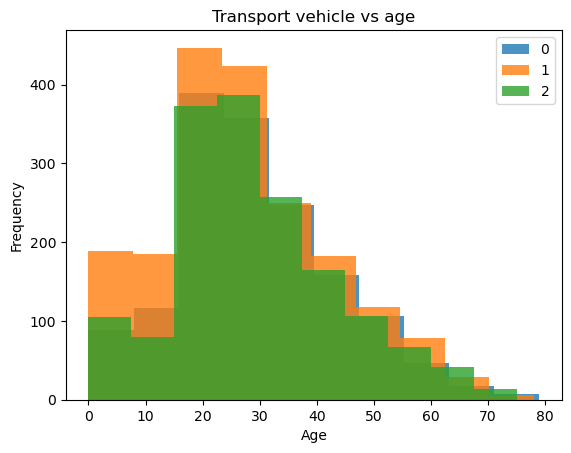

In [17]:
m = len(df_train )
t = []
a = []
b = []
for i in range(m):
    if df_train['Transported_Style'][i] == 0:
        t.append(df_train['Age'][i])
    if df_train['Transported_Style'][i] == 1:
        a.append(df_train['Age'][i])
    if df_train['Transported_Style'][i] == 2:
        b.append(df_train['Age'][i])

plt.hist(t, alpha=0.8, label='0')
plt.hist(a, alpha=0.8, label='1')
plt.hist(b, alpha=0.8, label='2')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Transport vehicle vs age')
plt.legend()
plt.show()


In [18]:
df_train = df_train.drop(columns='Age')
df_test = df_test.drop(columns='Age')

In [19]:
df_train

,Cabin,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True
Index,,,,,,,,,,,,,,,
0,P,-0.411891,1.415511,-0.309832,-0.002146,-0.323745,2,1,0,0,1,0,0,1,0
1,S,-0.321924,-0.335119,2.850697,-0.365048,-0.355311,0,0,0,1,0,0,1,1,0
2,P,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,0,0,1,0,0,1,1,0
3,S,-0.420070,6.353082,-0.402978,-0.226160,-0.148917,0,0,1,0,0,0,1,1,0
4,P,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,P,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,1,0,0,0,1,0,1,0
5033,S,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,0,0,1,0,0,1,1,0
5034,P,-0.420070,-0.335119,-0.402978,-0.365048,-0.355311,1,1,0,0,0,0,1,1,0


The torturous but really helpfull task of defining a class for everything i have done above and also flex my OOPS knowledge which i have learnt recently....

Since the dataprocessing part was already overkill, i decided to use XGBoost(devil's smile), which ended up giving 100% accuracy on both training and testing dataset, so i didnt experiment with other models, and used my saved time for completing all 4 tasks

In [20]:
class model:
     def __init__(self,dataset , dataset_test):

         
        self.dataset = dataset
        self.dataset_test = dataset_test


     def concatenating_cabin(self):
        m = len(self.dataset_test.Cabin)
        elements = []

        for i in range(m):
            s = self.dataset_test['Cabin'][i]
            last_element = s[-1]
            elements.append(last_element)
        self.dataset_test['Cabin'] = elements


     def split_accordn_to_spaceship(self):
        condition = (self.dataset['Cabin'] == 'P') & ((self.dataset['Transported_Style'] == 1) | (self.dataset['Transported_Style'] == 2))
        self.train_1_2 = self.dataset.loc[condition]
        condition = (self.dataset['Cabin'] == 'S') & ((self.dataset['Transported_Style'] == 1) | (self.dataset['Transported_Style'] == 0))
        self.train_1_0 = self.dataset.loc[condition]
        condition = (self.dataset_test['Cabin'] == 'P') & ((self.dataset_test['Transported_Style'] == 1) | (self.dataset_test['Transported_Style'] == 2))
        self.test_1_2 = self.dataset_test.loc[condition]
        condition = (self.dataset_test['Cabin'] == 'S') & ((self.dataset_test['Transported_Style'] == 1) | (self.dataset_test['Transported_Style'] == 0))
        self.test_1_0 = self.dataset_test.loc[condition]
        
        
     def one_hot_ecode(self):
        one_hot_encoded = pd.get_dummies(self.dataset_test['HomePlanet'])
        one_hot_encoded_1 = pd.get_dummies(self.dataset_test['Destination'])
        one_hot_encoded_3 = pd.get_dummies(self.dataset_test['VIP'])
        self.dataset_test = pd.concat([self.dataset_test, one_hot_encoded], axis=1)
        self.dataset_test = pd.concat([self.dataset_test, one_hot_encoded_1], axis=1)
        self.dataset_test = pd.concat([self.dataset_test, one_hot_encoded_3], axis=1)
        self.dataset_test = self.dataset_test.drop('HomePlanet', axis=1)
        self.dataset_test = self.dataset_test.drop('Destination', axis=1)
        self.dataset_test = self.dataset_test.drop('VIP', axis=1)
# splitting the dataset according to transport style((0,1),(1,2))
     def splitting_data(self):
        column_to_remove = 'Transported_Style'
        column_to_remove_1 = 'Cabin'
        self.X_0_1 = self.train_1_0.drop(column_to_remove, axis=1)
        self.X_0_1 = self.train_1_0.drop(column_to_remove_1, axis=1)
        self.Y_0_1 = self.train_1_0['Transported_Style']
        self.X_1_2 = self.train_1_2.drop(column_to_remove, axis=1)
        self.X_1_2 = self.train_1_2.drop(column_to_remove_1, axis=1)
        self.Y_1_2 = self.train_1_2['Transported_Style']-1
        self.T_X_0_1 = self.test_1_0.drop(column_to_remove, axis=1)
        self.T_X_0_1 = self.test_1_0.drop(column_to_remove_1, axis=1)
        self.T_Y_0_1 = self.test_1_0['Transported_Style']
        self.T_X_1_2 = self.test_1_2.drop(column_to_remove, axis=1)
        self.T_X_1_2 = self.test_1_2.drop(column_to_remove_1, axis=1)
        self.T_Y_1_2 = self.test_1_2['Transported_Style']-1
         

     def dropna(self):
        self.dataset_test = self.dataset_test.dropna()


        num_rows = len(self.dataset_test)
        index = [0]*num_rows
        t=0
        for i in range(num_rows):
            index[i]=t
            t =t+1
 
        self.dataset_test['Index'] = index
        self.dataset_test = self.dataset_test.set_index('Index')
        
        
#these hyperparamters i have used are from a past kaggle contest in which i participated, there also the dataset was similar
     def XGBoost(self):
        dtrain = xgb.DMatrix(self.X_0_1, label=self.Y_0_1)
        dtrain_1 = xgb.DMatrix(self.X_1_2, label=self.Y_1_2)
        dtest = xgb.DMatrix(self.T_X_0_1)
        dtest_1 = xgb.DMatrix(self.T_X_1_2)
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'eta': 0.3,
            'max_depth': 3
        }
        num_rounds = 10
        model = xgb.train(params, dtrain, num_rounds)
        model_1 = xgb.train(params, dtrain_1, num_rounds)
        y_pred = model.predict(dtest)
        y_pred_1 = model_1.predict(dtest_1)
        self.y_pred_binary = [round(value) for value in y_pred]
        self.y_pred_1_binary = [round(value) for value in y_pred_1]

     def accuracy(self):
        
        self.dropna()
        self.concatenating_cabin()
        self.one_hot_ecode()
        self.split_accordn_to_spaceship()
        self.splitting_data()
        self.XGBoost()
        self.accuracy_0 = accuracy_score(self.T_Y_0_1, self.y_pred_binary)
        self.accuracy_2 = accuracy_score(self.T_Y_1_2, self.y_pred_1_binary)

        return self.accuracy_0, self.accuracy_2 , self.y_pred_binary, self.y_pred_1_binary,self.T_Y_0_1,self.T_Y_1_2
      
        

In [21]:
final_model = model(dataset=df_train, dataset_test=df_test)
a,b,c,d,e,f = final_model.accuracy()

 

C:\Users\Trijal Srivastava\AppData\Local\Temp\ipykernel_24680\744705629.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



't' is the counter for number of times y_pred = y_true, and t is equal to 1435, number of rows in test data are also 1435, that means y_pred and y_true are legit same

In [22]:
final = pd.DataFrame()
f = f+1
c = pd.Series(c)
d = pd.Series(d)
d = d+1


 
final['Y_true'] = pd.concat([c, d], ignore_index=True) 
final['Y_pred'] = pd.concat([e, f], ignore_index=True)

m = len(final)
t=0

for i in range(m):
    if final['Y_pred'][i] == final['Y_true'][i]:
        t = t+1

print(t)
final
 

1435


,Y_true,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1430,2,2
1431,2,2
1432,2,2
1433,1,1
